In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/energy_usage.csv', parse_dates=['date'], infer_datetime_format=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1372 non-null   datetime64[ns]
 1   energy    1372 non-null   float64       
 2   temp      1372 non-null   float64       
 3   humidity  1372 non-null   float64       
 4   day       1372 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 53.7+ KB


In [4]:
df

,date,energy,temp,humidity,day
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday
...,...,...,...,...,...
1367,2016-05-27 14:00:00,101.666667,21.916667,59.000000,Friday
1368,2016-05-27 15:00:00,76.666667,22.216667,57.333333,Friday
1369,2016-05-27 16:00:00,135.000000,22.883333,55.000000,Friday
1370,2016-05-27 17:00:00,180.000000,22.666667,55.833333,Friday


In [5]:
df.head(15)

,date,energy,temp,humidity,day
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday
5,2016-01-12 12:00:00,186.666667,7.208333,80.166667,Tuesday
6,2016-01-12 13:00:00,151.666667,7.291667,79.833333,Tuesday
7,2016-01-12 14:00:00,136.666667,6.958333,78.916667,Tuesday
8,2016-01-12 15:00:00,36.666667,6.650000,78.500000,Tuesday
9,2016-01-12 16:00:00,40.000000,6.383333,79.083333,Tuesday


In [6]:
fig = px.line(df, x='date', y='energy', hover_data=['day','temp'], title='Energy Use')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=14, label="14d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [7]:
power_df=df.set_index('date')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6226a8550>,
      dtype=object)

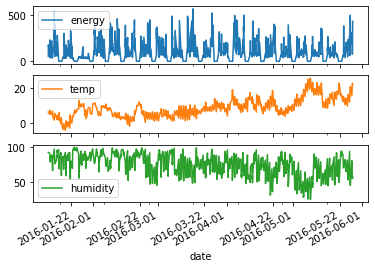

In [8]:
power_df.plot(subplots=True)

In [9]:
power_df

,energy,temp,humidity,day
date,,,,
2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday
2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday
2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday
2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday
2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday
...,...,...,...,...
2016-05-27 14:00:00,101.666667,21.916667,59.000000,Friday
2016-05-27 15:00:00,76.666667,22.216667,57.333333,Friday
2016-05-27 16:00:00,135.000000,22.883333,55.000000,Friday


In [11]:
filter1=df['day'] == 'Saturday'
filter2=df['day'] == 'Sunday'

df['weekday'] = np.where(filter1 | filter2, 0, 1)

In [12]:
df

,date,energy,temp,humidity,day,weekday
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday,1
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday,1
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday,1
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday,1
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday,1
...,...,...,...,...,...,...
1367,2016-05-27 14:00:00,101.666667,21.916667,59.000000,Friday,1
1368,2016-05-27 15:00:00,76.666667,22.216667,57.333333,Friday,1
1369,2016-05-27 16:00:00,135.000000,22.883333,55.000000,Friday,1
1370,2016-05-27 17:00:00,180.000000,22.666667,55.833333,Friday,1


In [13]:
df.query("day =='Saturday' or day =='Sunday'")

,date,energy,temp,humidity,day,weekday
42,2016-01-16 09:00:00,0.0,1.591667,96.166667,Saturday,0
43,2016-01-16 10:00:00,0.0,2.625000,94.166667,Saturday,0
44,2016-01-16 11:00:00,0.0,4.000000,90.500000,Saturday,0
45,2016-01-16 12:00:00,0.0,5.200000,78.250000,Saturday,0
46,2016-01-16 13:00:00,0.0,5.858333,71.833333,Saturday,0
...,...,...,...,...,...,...
1317,2016-05-22 14:00:00,0.0,16.550000,87.333333,Sunday,0
1318,2016-05-22 15:00:00,0.0,16.608333,87.083333,Sunday,0
1319,2016-05-22 16:00:00,0.0,16.325000,90.000000,Sunday,0
1320,2016-05-22 17:00:00,0.0,16.208333,91.666667,Sunday,0


In [15]:
df['time_bin'] = pd.cut(df['date'].dt.hour,bins=3, labels=False)

In [16]:
time_oh = pd.get_dummies(df['time_bin'], prefix='tbin')

In [17]:
df = df.join(time_oh)

In [18]:
df

,date,energy,temp,humidity,day,weekday,time_bin,tbin_0,tbin_1,tbin_2
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday,1,2,0,0,1
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday,1,2,0,0,1
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday,1,0,1,0,0
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday,1,0,1,0,0
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1367,2016-05-27 14:00:00,101.666667,21.916667,59.000000,Friday,1,1,0,1,0
1368,2016-05-27 15:00:00,76.666667,22.216667,57.333333,Friday,1,1,0,1,0
1369,2016-05-27 16:00:00,135.000000,22.883333,55.000000,Friday,1,2,0,0,1
1370,2016-05-27 17:00:00,180.000000,22.666667,55.833333,Friday,1,2,0,0,1


In [19]:
df_final = df[['date','energy','temp','humidity','weekday','tbin_0','tbin_1','tbin_2']].rename({'date':'ds','energy':'y'}, axis='columns')

In [20]:
df_final

,ds,y,temp,humidity,weekday,tbin_0,tbin_1,tbin_2
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,1,0,0,1
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,1,0,0,1
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,1,1,0,0
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,1,1,0,0
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,1,1,0,0
...,...,...,...,...,...,...,...,...
1367,2016-05-27 14:00:00,101.666667,21.916667,59.000000,1,0,1,0
1368,2016-05-27 15:00:00,76.666667,22.216667,57.333333,1,0,1,0
1369,2016-05-27 16:00:00,135.000000,22.883333,55.000000,1,0,0,1
1370,2016-05-27 17:00:00,180.000000,22.666667,55.833333,1,0,0,1


In [22]:
train = df_final[(df_final['ds'] >= '2016-01-11') & (df_final['ds'] <= '2016-05-15')]
test = df_final[(df_final['ds'] > '2016-05-15')]

In [23]:
train.shape

(1242, 8)

In [24]:
test.shape

(130, 8)

In [25]:
test

,ds,y,temp,humidity,weekday,tbin_0,tbin_1,tbin_2
1242,2016-05-15 09:00:00,0.000000,8.575000,67.166667,0,1,0,0
1243,2016-05-15 10:00:00,0.000000,9.475000,63.916667,0,1,0,0
1244,2016-05-15 11:00:00,0.000000,10.250000,59.750000,0,1,0,0
1245,2016-05-15 12:00:00,0.000000,10.891667,56.750000,0,1,0,0
1246,2016-05-15 13:00:00,0.000000,11.841667,52.500000,0,0,1,0
...,...,...,...,...,...,...,...,...
1367,2016-05-27 14:00:00,101.666667,21.916667,59.000000,1,0,1,0
1368,2016-05-27 15:00:00,76.666667,22.216667,57.333333,1,0,1,0
1369,2016-05-27 16:00:00,135.000000,22.883333,55.000000,1,0,0,1
1370,2016-05-27 17:00:00,180.000000,22.666667,55.833333,1,0,0,1


In [26]:
from fbprophet import Prophet
m = Prophet()

In [27]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [28]:
future = m.make_future_dataframe(periods=130, freq='H')
future.tail(50)

,ds
1322,2016-05-18 03:00:00
1323,2016-05-18 04:00:00
1324,2016-05-18 05:00:00
1325,2016-05-18 06:00:00
1326,2016-05-18 07:00:00
1327,2016-05-18 08:00:00
1328,2016-05-18 09:00:00
1329,2016-05-18 10:00:00
1330,2016-05-18 11:00:00
1331,2016-05-18 12:00:00


In [29]:
future = m.make_future_dataframe(periods=312, freq='H')
future.tail(50)

,ds
1504,2016-05-25 17:00:00
1505,2016-05-25 18:00:00
1506,2016-05-25 19:00:00
1507,2016-05-25 20:00:00
1508,2016-05-25 21:00:00
1509,2016-05-25 22:00:00
1510,2016-05-25 23:00:00
1511,2016-05-26 00:00:00
1512,2016-05-26 01:00:00
1513,2016-05-26 02:00:00


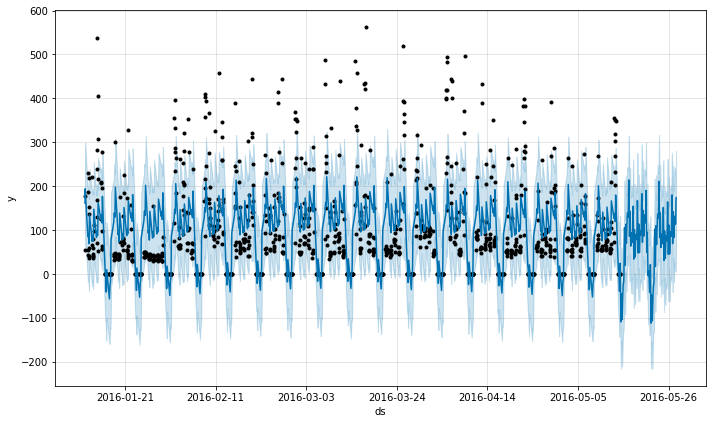

In [30]:
fcst = m.predict(future)
fig = m.plot(fcst)

In [31]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
1534,2016-05-26 23:00:00,68.842427,-41.544964,178.213195
1535,2016-05-27 00:00:00,84.642408,-25.362752,195.891062
1536,2016-05-27 01:00:00,117.869630,9.806113,215.319202
1537,2016-05-27 02:00:00,141.712202,35.703386,246.217011
1538,2016-05-27 03:00:00,139.643126,32.188194,243.245877
1539,2016-05-27 04:00:00,116.624552,6.119318,227.804495
1540,2016-05-27 05:00:00,92.091693,-14.009224,196.635262
1541,2016-05-27 06:00:00,82.776661,-16.012473,189.305585
1542,2016-05-27 07:00:00,91.012269,-18.100109,197.157208
1543,2016-05-27 08:00:00,107.076293,9.259580,212.618472


In [32]:
future_final = future.copy()
future_final = future_final[future_final['ds'].dt.hour > 8][future_final['ds'].dt.hour < 19]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [33]:
future_final.tail(50)

,ds
1448,2016-05-23 09:00:00
1449,2016-05-23 10:00:00
1450,2016-05-23 11:00:00
1451,2016-05-23 12:00:00
1452,2016-05-23 13:00:00
1453,2016-05-23 14:00:00
1454,2016-05-23 15:00:00
1455,2016-05-23 16:00:00
1456,2016-05-23 17:00:00
1457,2016-05-23 18:00:00


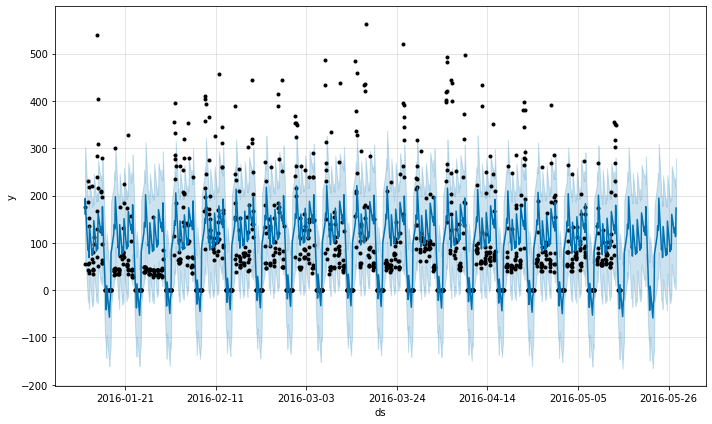

In [34]:
fcst = m.predict(future_final)
fig = m.plot(fcst)

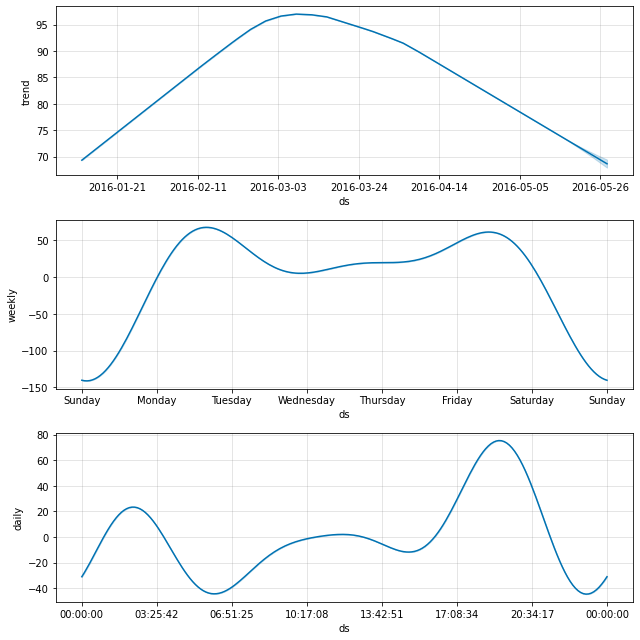

In [35]:
fig2 = m.plot_components(fcst)

In [36]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
1352,2016-05-26 09:00:00,81.359654,-23.794402,186.712099
1353,2016-05-26 10:00:00,88.986999,-27.256402,195.163510
1354,2016-05-26 11:00:00,93.219755,-19.960461,195.210686
1355,2016-05-26 12:00:00,95.421074,-7.429974,194.259678
1356,2016-05-26 13:00:00,93.805897,-19.764625,193.240448
1357,2016-05-26 14:00:00,88.267350,-22.837087,191.722898
1358,2016-05-26 15:00:00,85.591462,-14.851870,192.908035
1359,2016-05-26 16:00:00,96.577394,-6.439825,201.325440
1360,2016-05-26 17:00:00,125.226041,16.363103,238.754239
1361,2016-05-26 18:00:00,160.307060,54.655421,262.845873


In [37]:
fcst['day'] = fcst['ds'].dt.day_name()
fcst[['ds','day', 'yhat', 'yhat_lower', 'yhat_upper']].query("day == 'Saturday'")

,ds,day,yhat,yhat_lower,yhat_upper
42,2016-01-16 09:00:00,Saturday,7.397032,-96.717814,121.747999
43,2016-01-16 10:00:00,Saturday,6.024094,-104.755210,110.565249
44,2016-01-16 11:00:00,Saturday,1.235380,-107.064663,109.974104
45,2016-01-16 12:00:00,Saturday,-5.549542,-110.974960,97.463707
46,2016-01-16 13:00:00,Saturday,-16.056961,-125.183936,92.132764
...,...,...,...,...,...
1307,2016-05-21 14:00:00,Saturday,-31.146074,-137.601239,72.926336
1308,2016-05-21 15:00:00,Saturday,-42.384407,-148.428623,58.559498
1309,2016-05-21 16:00:00,Saturday,-39.680837,-149.016580,71.663817
1310,2016-05-21 17:00:00,Saturday,-18.970789,-118.289373,92.327173


In [38]:
m = Prophet(seasonality_mode='multiplicative', daily_seasonality=True, interval_width=0.95)
m.add_regressor('weekday',standardize=False)
m.add_regressor('temp',standardize=False )
m.add_regressor('tbin_0',standardize=False)
m.add_regressor('tbin_1',standardize=False)
m.add_regressor('tbin_2',standardize=False)

In [39]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [40]:
future_final=future_final.reset_index()

In [41]:
future_final['weekday'] = df_final['weekday']
future_final['temp'] = df_final['temp']
future_final['tbin_0'] = df_final['tbin_0']
future_final['tbin_1'] = df_final['tbin_1']
future_final['tbin_2'] = df_final['tbin_2']

In [42]:
future_final

,index,ds,weekday,temp,tbin_0,tbin_1,tbin_2
0,0,2016-01-11 17:00:00,1,6.308333,0,0,1
1,1,2016-01-11 18:00:00,1,5.941667,0,0,1
2,2,2016-01-12 09:00:00,1,5.008333,1,0,0
3,3,2016-01-12 10:00:00,1,5.758333,1,0,0
4,4,2016-01-12 11:00:00,1,6.650000,1,0,0
...,...,...,...,...,...,...,...
1367,1549,2016-05-27 14:00:00,1,21.916667,0,1,0
1368,1550,2016-05-27 15:00:00,1,22.216667,0,1,0
1369,1551,2016-05-27 16:00:00,1,22.883333,0,0,1
1370,1552,2016-05-27 17:00:00,1,22.666667,0,0,1


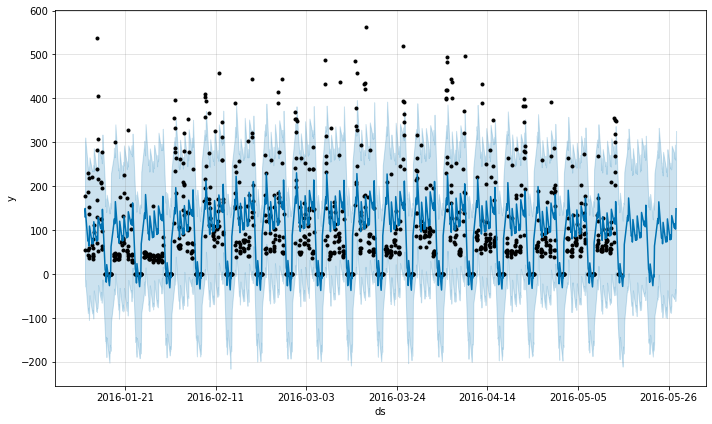

In [43]:
fcst = m.predict(future_final)
fig = m.plot(fcst)

In [44]:
fcst['day'] = fcst['ds'].dt.day_name()
fcst[['ds','day', 'yhat', 'yhat_lower', 'yhat_upper']].query("day == 'Saturday'")

,ds,day,yhat,yhat_lower,yhat_upper
42,2016-01-16 09:00:00,Saturday,10.439543,-144.673729,192.159221
43,2016-01-16 10:00:00,Saturday,8.263593,-152.878972,154.298932
44,2016-01-16 11:00:00,Saturday,7.617236,-142.972315,157.382616
45,2016-01-16 12:00:00,Saturday,2.249481,-156.840723,171.578494
46,2016-01-16 13:00:00,Saturday,1.065888,-158.736786,171.333268
...,...,...,...,...,...
1307,2016-05-21 14:00:00,Saturday,-13.387063,-182.470868,157.420737
1308,2016-05-21 15:00:00,Saturday,-19.001277,-179.143504,146.552249
1309,2016-05-21 16:00:00,Saturday,-17.672665,-170.157820,158.321895
1310,2016-05-21 17:00:00,Saturday,4.068098,-163.726292,165.333581
